In [3]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Artificial Neural Networks (ANNs): An Artificial Neural Network is the most basic form of deep learning. It consists of layers of neurons, 
# •	Input layer: Where the data is fed into the network.
# •	Hidden layers: Layers that process the data using activation functions.
# •	Output layer: Where the final output or prediction is generated.
# # Business Application: Credit Scoring: Predicting whether a loan applicant will default or not based on their credit history, 
# income, and other features.

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generating a synthetic dataset (e.g., customer data for loan approval)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the ANN model
model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluating the model
accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy[1] * 100:.2f}%')

C:\Users\mahav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6669 - loss: 0.6188
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8283 - loss: 0.4647
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8686 - loss: 0.3688
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8732 - loss: 0.3222
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8722 - loss: 0.3010
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8841 - loss: 0.3062
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8880 - loss: 0.2649
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8952 - loss: 0.2656
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9218 - loss: 0.2376
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9066 - loss: 0.2544
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8488 - loss: 0.3624  
Accuracy: 85.00%


In [5]:
# Convolutional Neural Networks (CNNs): CNNs are particularly well-suited for processing grid-like data, such as images. 
# They use convolutional layers to apply filters to input data, helping extract spatial hierarchies of features.
# Business Appln: Fraud Detection: Detecting fraudulent signatures or images (such as checks or identity documents) by analyzing scanned images.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset (as a proxy for banking image data)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing the data
x_train = np.expand_dims(x_train, -1).astype('float32') / 255
x_test = np.expand_dims(x_test, -1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Building the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(x_train, y_train, epochs=5, batch_size=128)

# Evaluating the model
accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy[1] * 100:.2f}%')

# In this scenario, the CNN model achieves a high accuracy in classifying images. If applied to the banking use case, 
# such a model could be used to verify handwritten signatures or check images, ensuring that fraudulent documents are detected.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


C:\Users\mahav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - accuracy: 0.8559 - loss: 0.5155
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9816 - loss: 0.0604
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 54ms/step - accuracy: 0.9883 - loss: 0.0378
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9898 - loss: 0.0310
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9924 - loss: 0.0243
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9886 - loss: 0.0325
Accuracy: 99.16%


In [6]:
# Recurrent Neural Networks (RNNs): - RNNs are specialized for sequential data and time series. 
# They have loops in their architecture that allow information to persist.
# Business Application: Time Series Forecasting: Predicting future stock prices or customer transaction behavior.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np

# Generating synthetic sequential data (e.g., customer transactions over time)
X = np.array([[i] for i in range(100)])
y = X * 2  # Simple linear relationship

# Reshaping X for RNN input [samples, timesteps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Building the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(1, 1), activation='relu'))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X, y, epochs=10, batch_size=1)

# Making predictions
predictions = model.predict(X)
print(predictions[:5])  # Show the first 5 predictions

C:\Users\mahav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 12203.8369
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2901.7075
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 460.2867
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 16.4777
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8102
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4995
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4840
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5404
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4757
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4897
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[1.2544065]
 [3.309136 ]
 [5.302489 ]
 [7.2822456]
 [9.262002 ]]


In [7]:
# Long Short-Term Memory Networks (LSTMs): LSTMs are a type of RNN that are better at capturing long-term dependencies 
# in sequential data by addressing the vanishing gradient problem.
# Business Application: Loan Default Prediction: Predicting if a borrower is likely to default based on their past behavior.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Simulating time-series data for loan defaults prediction
X = np.array([i for i in range(100)]).reshape(-1, 1)
y = np.array([1 if i > 50 else 0 for i in range(100)])  # Default after 50

# Reshaping X for LSTM input [samples, timesteps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X, y, epochs=10, batch_size=1)

# Making predictions
predictions = model.predict(X)
print(predictions[:5])

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7964 - loss: 0.6082
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9481 - loss: 0.3027
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9646 - loss: 0.2071
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9533 - loss: 0.1908
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9905 - loss: 0.1290
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9666 - loss: 0.1373
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9893 - loss: 0.1139
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9803 - loss: 0.1202
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9874 - loss: 0.0976
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9837 - loss: 0.0605
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step
[[0.35657537]
 [0.26562288]
 [0.1872716 ]
 [0.1270756 ]
 [0.08490228]]


In [8]:
# Types of Artificial Neural Networks (ANNs):
# Feedforward Neural Networks (FNN): FNN is the simplest type of ANN where information flows in one direction: 
# from the input layer through the hidden layers to the output layer. There are no cycles or feedback loops. 
# # Business Application: Loan Default Prediction: FNNs can predict whether a customer will default on a loan based on historical financial data.
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate synthetic data (features like income, credit score, etc.)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the Feedforward Neural Network (FNN)
model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification (default or not)

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy[1] * 100:.2f}%')

Epoch 1/10


C:\Users\mahav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5783 - loss: 0.6839
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7993 - loss: 0.5145
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8445 - loss: 0.4127
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8560 - loss: 0.3625
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8859 - loss: 0.3219
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8881 - loss: 0.3250
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9020 - loss: 0.2795
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9085 - loss: 0.2651
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9163 - loss: 0.2668
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9152 - loss: 0.2475
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8430 - loss: 0.3803  
Accuracy: 83.67%


In [9]:
# Multilayer Perceptron (MLP): is a type of feedforward neural network with more than one hidden layer. It is considered the 
# classic neural network architecture and is capable of modeling complex relationships between inputs and outputs.
# # Business Application: Customer Segmentation: MLP can be used to segment bank customers based on behaviors, 
# such as spending patterns or transaction histories.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Simulated customer data (e.g., age, income, transaction history, etc.)
X = np.random.rand(1000, 5)  # 1000 samples with 5 features
y = np.random.randint(0, 2, 1000)  # Binary classification (0 or 1)

# Building the Multilayer Perceptron model
model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X, y, epochs=10, batch_size=32)

# Evaluating the model
accuracy = model.evaluate(X, y)
print(f'Accuracy: {accuracy[1] * 100:.2f}%')

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4717 - loss: 0.6961
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5184 - loss: 0.6927
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5397 - loss: 0.6915
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5096 - loss: 0.6917
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5365 - loss: 0.6906
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5420 - loss: 0.6886
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5340 - loss: 0.6885
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5582 - loss: 0.6876
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5539 - loss: 0.6860
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5357 - loss: 0.6890
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5465 - loss: 0.6839
Accuracy: 54.70%


In [10]:
# Radial Basis Function Networks (RBFN): RBFN is a type of ANN that uses radial basis functions as activation functions. 
# They are typically used for classification and regression problems.
# Business Use Case in Banking: Credit Risk Assessment: RBFNs can be used to classify customers based on their creditworthiness 
# by analyzing past behavior and features such as income, loan history, etc.

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np

# Simulating data (features like income, credit history, etc.)
X = np.random.rand(1000, 5)
y = np.random.randint(0, 2, 1000)

# Using KMeans to simulate radial basis function transformations
kmeans = KMeans(n_clusters=5)
X_rbf = kmeans.fit_transform(X)

# Classifier: Support Vector Classifier (SVC)
svm = SVC(kernel='rbf')
svm.fit(X_rbf, y)

# Evaluating the model
y_pred = svm.predict(X_rbf)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.56      0.59       496
           1       0.60      0.65      0.62       504

    accuracy                           0.61      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.61      0.61      0.61      1000



In [11]:
# Self-Organizing Maps (SOM): SOM is an unsupervised learning algorithm used to cluster similar data points into groups. 
# It is useful for dimensionality reduction and visualization.
# Business Application: Customer Behavior Clustering: SOM can be used to group customers based on spending behaviors 
# or transaction patterns, enabling personalized financial offerings.

import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Simulated customer transaction data
X = np.random.rand(100, 5)  # 100 customers, 5 features

# Initializing and training the Self-Organizing Map (SOM)
som = MiniSom(x=10, y=10, input_len=5, sigma=1.0, learning_rate=0.5)
som.train(X, 100)

# Plotting the result
plt.imshow(som.distance_map().T, cmap='coolwarm', origin='lower')
plt.colorbar()
plt.show()

ModuleNotFoundError: No module named 'minisom'

In [12]:
# Convolutional Neural Networks (CNNs) are a class of deep learning models primarily designed for processing grid-like data,
# particularly images. CNNs are inspired by the human visual system, which processes information through receptive fields 
# and hierarchical feature extraction. CNNs are particularly effective for image-related tasks, including classification, 
# object detection, and segmentation. However, CNNs can also be applied to non-image data in certain scenarios, 
# like time-series data or financial data with a spatial or grid-like structure.

# Business Application: Check Image Classification: Detecting fraudulent checks or reading handwritten data 
# (such as check amounts or account numbers) from scanned images.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build LeNet-5-like model
model = Sequential([
    Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Pooling layer
    Conv2D(16, (5, 5), activation='tanh'),  # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Pooling layer
    Flatten(),  # Flatten the output
    Dense(120, activation='tanh'),  # Fully connected layer
    Dense(84, activation='tanh'),  # Fully connected layer
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64)

# Evaluate the model
accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy[1] * 100:.2f}%')

Epoch 1/5


C:\Users\mahav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.8672 - loss: 0.4636
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9787 - loss: 0.0720
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9846 - loss: 0.0480
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9894 - loss: 0.0350
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9907 - loss: 0.0285
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9813 - loss: 0.0597
Accuracy: 98.55%


In [14]:
# 2. AlexNet: A Deeper CNN for Large-Scale Image Classification: AlexNet was designed for large-scale image classification 
# (ImageNet challenge). It is a deeper model compared to LeNet-5, consisting of five convolutional layers followed by three fully connected layers.
# Business Application: Fraud Detection in Check Processing: Classifying and detecting fraudulent checks based on visual features
# or unusual patterns in check images.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Preprocessing (assuming you have a dataset of check images)
train_datagen = ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Assuming your check images are organized in subfolders by class
train_generator = train_datagen.flow_from_directory('data/train', target_size=(227, 227), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory('data/validation', target_size=(227, 227), batch_size=32, class_mode='binary')

# Building the AlexNet model
model = Sequential([
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Conv2D(256, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Conv2D(384, (3, 3), activation='relu'),
    Conv2D(384, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=5, validation_data=validation_generator)

# Evaluate the model
accuracy = model.evaluate(validation_generator)
print(f'Accuracy: {accuracy[1] * 100:.2f}%')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/train'

In [15]:
# 3. VGGNet: A Simpler, Deep Architecture for Image Classification: VGGNet consists of multiple convolutional layers with small 
# receptive fields (3x3) stacked on top of each other. It’s known for its simplicity and depth.
# Business Application: •	Automated Document Classification: VGGNet can classify bank documents (e.g., loan applications, forms) 
# into different categories (e.g., approved, pending, rejected).

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Preprocessing (assuming you have a dataset of bank documents)
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create a base VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Final model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
train_generator = train_datagen.flow_from_directory('data/train', target_size=(224, 224), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory('data/validation', target_size=(224, 224), batch_size=32, class_mode='binary')

model.fit(train_generator, epochs=5, validation_data=validation_generator)

# Evaluate the model
accuracy = model.evaluate(validation_generator)
print(f'Accuracy: {accuracy[1] * 100:.2f}%')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/train'

In [16]:
# Recurrent Neural Networks (RNNs) are a class of neural networks designed to handle sequential data, where the output 
# from previous steps in a sequence is used as input for the current step. Unlike traditional feedforward networks,
# RNNs have a memory element that allows them to maintain information over time, making them particularly useful for tasks 
# that require understanding temporal dependencies, such as speech recognition, time series forecasting, and text generation.
# Vanilla RNN: A Basic Recurrent Neural Network - The vanilla RNN is the most basic form of RNN, where the output at each time 
# step is a function of the current input and the previous hidden state. It can be used for time-series prediction, but its ability
# to handle long-term dependencies is limited.
# Business Application: Transaction Sequence Analysis for Fraud Detection: RNNs can analyze a sequence of transactions to detect
# unusual patterns, such as multiple transactions from different locations within a short time.

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate synthetic transaction data (time series data for 1000 customers, each with 10 transactions)
X = np.random.rand(1000, 10, 5)  # 1000 samples, 10 time steps, 5 features (e.g., amount, location, merchant)
y = np.random.randint(0, 2, 1000)  # Binary fraud (1) or not fraud (0)

# Scale features (important for RNNs)
scaler = StandardScaler()
X = X.reshape(-1, 5)
X = scaler.fit_transform(X)
X = X.reshape(1000, 10, 5)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Vanilla RNN model
model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(10, 5)),  # 10 time steps, 5 features
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy[1] * 100:.2f}%')

Epoch 1/5


C:\Users\mahav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5058 - loss: 0.7730
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5544 - loss: 0.6809
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6162 - loss: 0.6619
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6441 - loss: 0.6372
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6322 - loss: 0.6314
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4353 - loss: 0.7772
Accuracy: 44.33%


In [17]:
# Long Short-Term Memory (LSTM): Overcoming the Vanishing Gradient Problem - LSTM is a more sophisticated RNN architecture that 
# solves the vanishing gradient problem by using gates (input, output, forget) to control the flow of information.
# Business Application: Credit Risk Prediction: LSTM can be used to analyze the temporal relationships between 
# customer transaction histories, income fluctuations, and loan repayment behaviors to predict whether a customer will default on a loan.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data for classification (customer data, 10 time steps, 5 features)
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_classes=2)
X = X.reshape(1000, 10, 5)  # Reshaping to have 10 time steps (sequence length)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build LSTM model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(10, 5)),  # 10 time steps, 5 features
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy[1] * 100:.2f}%')

ValueError: cannot reshape array of size 5000 into shape (1000,10,5)

In [18]:
# Gated Recurrent Unit (GRU): A Simplified Version of LSTM: The GRU is similar to LSTM but with a simpler architecture.
# It combines the forget and input gates into a single update gate and has fewer parameters, making it faster and less computationally expensive.
# Business Application: Loan Default Prediction: GRU can be used to analyze past loan repayment data over time and
# predict whether a customer is likely to default.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data (customer financial data with 10 time steps)
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_classes=2)
X = X.reshape(1000, 10, 5)  # Reshape for sequence data

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build GRU model
model = Sequential([
    GRU(64, activation='tanh', input_shape=(10, 5)),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy[1] * 100:.2f}%')

ValueError: cannot reshape array of size 5000 into shape (1000,10,5)

In [19]:
# Bidirectional RNN: Capturing Information from Both Past and Future - Bidirectional RNNs process sequences in both forward 
# and backward directions, which allows them to capture dependencies from both the past and the future in sequence data.
# Business Application: Customer Sentiment Analysis: Understanding customer feedback over time from their interaction logs 
# (emails, messages) can be improved by considering both past and future feedback.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic sentiment analysis data
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_classes=2)
X = X.reshape(1000, 10, 5)  # Reshaping to time series data

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(64, activation='tanh'), input_shape=(10, 5)),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy[1] * 100:.2f}%')

ValueError: cannot reshape array of size 5000 into shape (1000,10,5)

In [20]:
# Long Short-Term Memory (LSTM) networks are a special kind of Recurrent Neural Network (RNN) designed to address the shortcomings of 
# vanilla RNNs, particularly the vanishing gradient problem, when learning long-term dependencies in sequential data. LSTMs are 
# highly effective for time-series prediction, language modeling, speech recognition, and various other tasks that require
# modeling temporal sequences or sequential data over time.
# 1. Vanilla LSTM for Fraud Detection in Transactions - We will use LSTM to detect fraudulent transactions from a sequence 
# of transaction data. This data might include features such as transaction amount, merchant ID, customer ID, time, location, etc.
# Business Application: Fraud Detection: Identify unusual patterns or anomalies in transaction sequences that may indicate fraudulent activity.

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic transaction data: 1000 samples, 10 time steps, 5 features
X = np.random.rand(1000, 10, 5)  # 1000 customers, each with 10 transactions (time steps), 5 features
y = np.random.randint(0, 2, 1000)  # Binary fraud label (1: fraud, 0: non-fraud)

# Normalize features
scaler = StandardScaler()
X = X.reshape(-1, 5)  # Flatten for scaling
X = scaler.fit_transform(X)
X = X.reshape(1000, 10, 5)  # Reshape back to (samples, time_steps, features)

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the LSTM model for fraud detection
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(10, 5)),  # 10 time steps, 5 features per step
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy[1] * 100:.2f}%")

Epoch 1/5


C:\Users\mahav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4680 - loss: 0.6954
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5451 - loss: 0.6884
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5716 - loss: 0.6844
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5737 - loss: 0.6852
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5668 - loss: 0.6797
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4903 - loss: 0.6968
Accuracy: 46.67%


In [21]:
# Bidirectional LSTM for Predicting Loan Default - Bidirectional LSTM networks allow the model to process sequences in both directions
# (forward and backward), which can help capture additional context in sequential data.
# Business Application: Loan Default Prediction: Predict whether a customer will default on a loan based on their 
# historical loan repayment data, using both past and future financial patterns.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic customer loan data (1000 samples, 10 time steps, 5 features)
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_classes=2)
X = X.reshape(1000, 10, 5)  # Reshape to have 10 time steps for sequence data

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(64, activation='tanh', return_sequences=False), input_shape=(10, 5)),
    Dense(1, activation='sigmoid')  # Output layer for binary classification (default or not)
])

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy[1] * 100:.2f}%")

ValueError: cannot reshape array of size 5000 into shape (1000,10,5)

In [22]:
# Stacked LSTM for Stock Price Prediction - A Stacked LSTM consists of multiple LSTM layers stacked on top of each other. 
# This model is useful when you need to learn more complex patterns in sequential data.
# Business Application: Stock Price Prediction: Predict future stock prices based on historical prices using multiple LSTM layers 
# to capture more complex patterns.

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Generate synthetic stock data (1000 samples, 10 time steps, 5 features)
X = np.random.rand(1000, 10, 5)  # Stock features (e.g., open price, close price, volume)
y = np.random.rand(1000, 1)  # Next day's price

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
X = X.reshape(-1, 5)  # Flatten for scaling
X = scaler.fit_transform(X)
X = X.reshape(1000, 10, 5)  # Reshape back to (samples, time_steps, features)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Stacked LSTM model
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(10, 5)),
    LSTM(64, activation='tanh', return_sequences=False),
    Dense(1)  # Output layer for predicting stock price
])

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse:.4f}")

Epoch 1/5


C:\Users\mahav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1786
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0844
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0871
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0801
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0830
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0821
Mean Squared Error: 0.0820


In [23]:
# Generative Adversarial Networks (GANs) are a class of deep learning models introduced by Ian Goodfellow and his collaborators in 2014.
# GANs consist of two neural networks, the Generator and the Discriminator, which compete against each other in a process known as 
# adversarial training.
# Vanilla GAN for Generating Synthetic Transaction Data: The Vanilla GAN consists of a Generator and Discriminator that work together 
# to generate synthetic data. We’ll use a simple dataset for this purpose and generate fake customer transaction data.

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Create a simple dataset for demonstration: real data (e.g., transaction amount)
real_data = np.random.normal(50, 10, 1000)  # 1000 real transaction amounts

# Normalize the data to range (-1, 1)
real_data = (real_data - np.min(real_data)) / (np.max(real_data) - np.min(real_data)) * 2 - 1

# Generator Model
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_dim=100),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='tanh')
    ])
    return model

# Discriminator Model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=1),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# GAN Model
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator when training the GAN
    model = tf.keras.Sequential([generator, discriminator])
    return model

# Create the models
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Compile the models
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the GAN
def train_gan(epochs=10000, batch_size=128):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Train discriminator on real data
        real_samples = np.random.choice(real_data, half_batch)
        real_labels = np.ones((half_batch, 1))
        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        
        # Train discriminator on fake data
        noise = np.random.randn(half_batch, 100)  # Latent space input
        fake_samples = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1))
        d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
        
        # Train the GAN (generator) to fool the discriminator
        noise = np.random.randn(batch_size, 100)
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)
        
        # Print progress
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, D Loss Real: {d_loss_real[0]}, D Loss Fake: {d_loss_fake[0]}, G Loss: {g_loss[0]}")

# Start the training
train_gan()

# Generate some fake transaction data after training
noise = np.random.randn(100, 100)
generated_data = generator.predict(noise)

# Plot generated data
plt.hist(generated_data, bins=30)
plt.title("Generated Transaction Data")
plt.show()

C:\Users\mahav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: 'NoneType' object has no attribute 'update_state'

In [ ]:
# A Conditional GAN (cGAN) is an extension of GANs where both the Generator and Discriminator are conditioned on some 
# additional information (e.g., class labels). For example, we can condition the generation of synthetic transaction data on 
# specific customer attributes (e.g., customer age, transaction type).

from tensorflow.keras.layers import Embedding, Concatenate

# Modified Generator with Conditional Input (e.g., customer category)
def build_conditional_generator(latent_dim, num_classes):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=latent_dim + num_classes),  # Latent + class info
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='tanh')
    ])
    return model

# Modified Discriminator with Conditional Input (e.g., customer category)
def build_conditional_discriminator(input_shape, num_classes):
    input_layer = layers.Input(shape=input_shape)
    label_input = layers.Input(shape=(num_classes,))
    x = Concatenate()([input_layer, label_input])  # Concatenate input with labels
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=[input_layer, label_input], outputs=x)
    return model

# Create models
latent_dim = 100
num_classes = 10  # Assuming 10 customer categories
generator = build_conditional_generator(latent_dim, num_classes)
discriminator = build_conditional_discriminator((1,), num_classes)
gan = build_gan(generator, discriminator)

# Compile models
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the cGAN
def train_conditional_gan(epochs=10000, batch_size=128):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Random labels (for conditioning)
        labels = np.random.randint(0, num_classes, half_batch)
        labels = np.expand_dims(labels, axis=1)

        # Train discriminator on real data
        real_samples = np.random.choice(real_data, half_batch)
        real_labels = np.ones((half_batch, 1))
        d_loss_real = discriminator.train_on_batch([real_samples, labels], real_labels)

        # Train discriminator on fake data
        noise = np.random.randn(half_batch, latent_dim)
        fake_samples = generator.predict([noise, labels])
        fake_labels = np.zeros((half_batch, 1))
        d_loss_fake = discriminator.train_on_batch([fake_samples, labels], fake_labels)

        # Train the GAN (generator)
        noise = np.random.randn(batch_size, latent_dim)
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch([noise, labels], valid_labels)

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, D Loss Real: {d_loss_real[0]}, D Loss Fake: {d_loss_fake[0]}, G Loss: {g_loss[0]}")

# Train cGAN
train_conditional_gan()

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0815 - val_loss: 0.0083
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - val_loss: 0.0016
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_loss: 9.6831e-05
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7313e-05 - val_loss: 1.6219e-05
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0013e-05 - val_loss: 1.1226e-06
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0815e-06 - val_loss: 8.0269e-07
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1261e-06 - val_loss: 5.3953e-07
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.1513e-07 - val_loss: 3.1258e-07
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5279e-07 - val_loss: 2.0503e-07
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.5845e-07 - val_loss: 1.8095e-07
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.0026e-07 - val_loss: 1.2758e-07
Epo

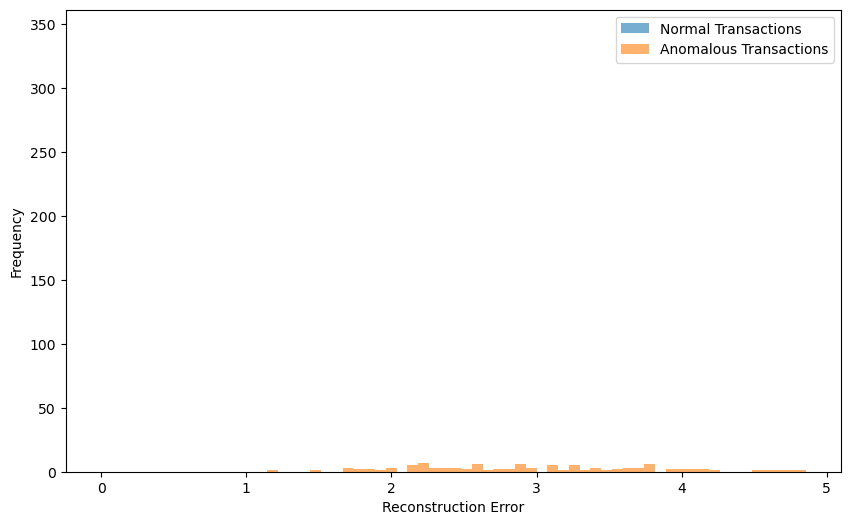

In [24]:
# An Autoencoder is a type of unsupervised neural network that learns to efficiently encode (compress) data into a 
# lower-dimensional representation and then reconstruct it back into the original data. The goal of the autoencoder is to 
# learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction, feature extraction, 
# or anomaly detection. Autoencoders are a form of unsupervised learning because they do not require labeled data.
# Vanilla Autoencoder for Anomaly Detection in Transactions - Let’s implement a Vanilla Autoencoder for detecting anomalies 
# in transaction data. The goal is to train an autoencoder on "normal" transaction data and identify anomalous (fraudulent) 
# transactions as those that cannot be well reconstructed by the model.

import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic transaction data (normal and anomalous transactions)
# Normal transactions: 1000 samples of values between 50 and 200
normal_transactions = np.random.normal(100, 20, 1000)
# Anomalous transactions: 100 samples of values between 500 and 1000
anomalous_transactions = np.random.normal(700, 150, 100)

# Combine normal and anomalous data
data = np.concatenate([normal_transactions, anomalous_transactions])
data = data.reshape(-1, 1)  # Reshaping for the autoencoder

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split data into normal and anomalous for later evaluation
normal_data = data_scaled[:1000]
anomalous_data = data_scaled[1000:]

# Define the Autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(1, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='mse')

# Train the Autoencoder
autoencoder.fit(normal_data, normal_data, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the reconstruction loss for the normal and anomalous data
normal_reconstructions = autoencoder.predict(normal_data)
anomalous_reconstructions = autoencoder.predict(anomalous_data)

# Calculate the reconstruction error
normal_error = np.mean(np.abs(normal_data - normal_reconstructions), axis=1)
anomalous_error = np.mean(np.abs(anomalous_data - anomalous_reconstructions), axis=1)

# Plot the reconstruction error distribution
plt.figure(figsize=(10, 6))
plt.hist(normal_error, bins=50, alpha=0.6, label='Normal Transactions')
plt.hist(anomalous_error, bins=50, alpha=0.6, label='Anomalous Transactions')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0682 - val_loss: 0.0027
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - val_loss: 4.5874e-04
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0777e-04 - val_loss: 2.9141e-05
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5664e-05 - val_loss: 1.2357e-05
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.5405e-06 - val_loss: 8.1885e-06
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7018e-06 - val_loss: 6.9365e-06
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.7471e-06 - val_loss: 5.8606e-06
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.4278e-06 - val_loss: 5.0617e-06
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4049e-06 - val_loss: 4.1437e-06
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.9485e-07 - val_loss: 3.9566e-06
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3370e-07 - val_loss: 3.7

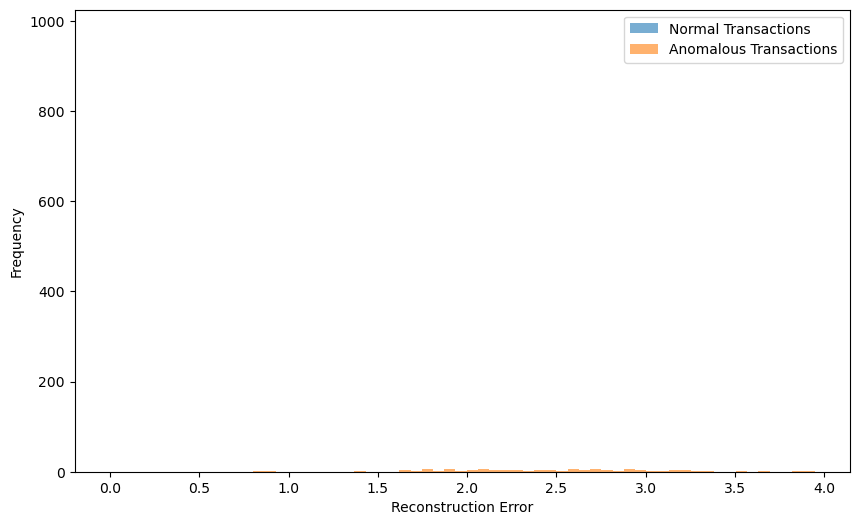

Number of anomalies detected: 100


In [25]:
# An Autoencoder is a type of unsupervised neural network that learns to efficiently encode (compress) data into a 
# lower-dimensional representation and then reconstruct it back into the original data. The goal of the autoencoder is to 
# learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction, feature extraction,
# or anomaly detection. Autoencoders are a form of unsupervised learning because they do not require labeled data.
# Vanilla Autoencoder for Anomaly Detection in Transactions - Let’s implement a Vanilla Autoencoder for 
# detecting anomalies in transaction data. The goal is to train an autoencoder on "normal" transaction data 
# and identify anomalous (fraudulent) transactions as those that cannot be well reconstructed by the model.

import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic transaction data (normal and anomalous transactions)
# Normal transactions: 1000 samples of values between 50 and 200
normal_transactions = np.random.normal(100, 20, 1000)
# Anomalous transactions: 100 samples of values between 500 and 1000
anomalous_transactions = np.random.normal(700, 150, 100)

# Combine normal and anomalous data
data = np.concatenate([normal_transactions, anomalous_transactions])
data = data.reshape(-1, 1)  # Reshaping for the autoencoder

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split data into normal and anomalous for later evaluation
normal_data = data_scaled[:1000]
anomalous_data = data_scaled[1000:]

# Define the Autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(1, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='mse')

# Train the Autoencoder
autoencoder.fit(normal_data, normal_data, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the reconstruction loss for the normal and anomalous data
normal_reconstructions = autoencoder.predict(normal_data)
anomalous_reconstructions = autoencoder.predict(anomalous_data)

# Calculate the reconstruction error
normal_error = np.mean(np.abs(normal_data - normal_reconstructions), axis=1)
anomalous_error = np.mean(np.abs(anomalous_data - anomalous_reconstructions), axis=1)

# Plot the reconstruction error distribution
plt.figure(figsize=(10, 6))
plt.hist(normal_error, bins=50, alpha=0.6, label='Normal Transactions')
plt.hist(anomalous_error, bins=50, alpha=0.6, label='Anomalous Transactions')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Anomaly detection: Transactions with error > threshold are anomalous
threshold = 0.1  # Set a threshold based on the distribution
anomalies = anomalous_error > threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8546 - val_loss: 0.3490
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2825 - val_loss: 0.0339
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0205 - val_loss: 0.0077
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0069 - val_loss: 0.0014
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - val_loss: 2.1169e-04
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3850e-04 - val_loss: 1.1519e-04
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2975e-04 - val_loss: 9.7368e-05
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0248e-04 - val_loss: 9.2424e-05
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0944e-04 - val_loss: 9.1105e-05
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0641e-04 - val_loss: 9.6736e-05
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0374e-04 - val_loss: 9.5814e-05
Epoch 12/50
25/2

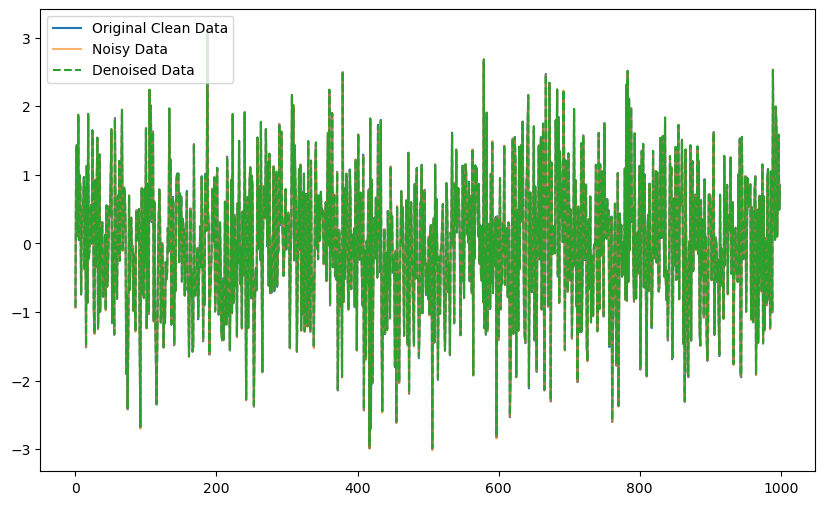

In [26]:
# Example 2: Denoising Autoencoder for Preprocessing Transaction Data - A Denoising Autoencoder (DAE) is a type of autoencoder 
# that is trained to reconstruct the original input data from a corrupted version of it. This can be useful for removing noise 
# in transaction data before feeding it into another model for analysis.

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate synthetic clean transaction data (normal transactions)
clean_data = np.random.normal(100, 20, 1000).reshape(-1, 1)

# Add noise to the clean data
noise_factor = 0.2
noisy_data = clean_data + noise_factor * np.random.normal(size=clean_data.shape)

# Normalize the data
scaler = StandardScaler()
clean_data_scaled = scaler.fit_transform(clean_data)
noisy_data_scaled = scaler.transform(noisy_data)

# Define Denoising Autoencoder Architecture
input_layer = Input(shape=(1,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(1, activation='linear')(decoded)

denoising_autoencoder = Model(input_layer, decoded)

# Compile the model
denoising_autoencoder.compile(optimizer='adam', loss='mse')

# Train the Denoising Autoencoder
denoising_autoencoder.fit(noisy_data_scaled, clean_data_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Denoise the noisy data
denoised_data = denoising_autoencoder.predict(noisy_data_scaled)

# Plot original, noisy, and denoised data
plt.figure(figsize=(10, 6))
plt.plot(clean_data_scaled, label='Original Clean Data')
plt.plot(noisy_data_scaled, label='Noisy Data', alpha=0.6)
plt.plot(denoised_data, label='Denoised Data', linestyle='dashed')
plt.legend()
plt.show()

In [27]:
# Transformers are a class of deep learning models introduced by Vaswani et al. in the paper "Attention is All You Need" (2017). 
# They revolutionized natural language processing (NLP) and machine learning by introducing the self-attention mechanism, 
# which allows models to handle long-range dependencies in sequences much more effectively than previous architectures like RNNs or LSTMs.
# Transformers have since become the backbone for state-of-the-art models in NLP (e.g., GPT, BERT) and have also been applied successfully 
# in domains like time series forecasting, computer vision, and more. In this detailed explanation, we'll explore Transformer networks, 
# their variants, and their application in banking.
# Fraud Detection (Anomaly Detection in Transaction Sequences) - For simplicity, we will use the Vanilla Transformer architecture 
# for fraud detection in transaction sequences.

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.models import Model

# Create synthetic transaction data: a simple sequence of transaction amounts
# 1000 normal sequences and 100 anomalous sequences (fraudulent)
normal_data = np.random.normal(100, 20, (1000, 10))  # 1000 normal sequences, each of length 10
anomalous_data = np.random.normal(500, 150, (100, 10))  # 100 anomalous sequences

# Concatenate both datasets
data = np.concatenate([normal_data, anomalous_data])

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Transformer model architecture
def build_transformer(input_shape):
    inputs = Input(shape=input_shape)
    
    # Transformer block
    attention = MultiHeadAttention(num_heads=2, key_dim=64)(inputs, inputs)
    attention = LayerNormalization()(attention)
    attention = Dropout(0.1)(attention)
    
    # Feedforward layer
    ffn = Dense(128, activation='relu')(attention)
    ffn = Dense(1)(ffn)  # Output for anomaly score
    
    model = Model(inputs, ffn)
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Build and train the model
model = build_transformer((10,))
model.summary()

# Train the model with normal data (unsupervised anomaly detection)
model.fit(normal_data, normal_data, epochs=10, batch_size=32, validation_split=0.2)

# Predict the anomaly scores for both normal and anomalous data
normal_scores = model.predict(normal_data)
anomalous_scores = model.predict(anomalous_data)

# Compare the reconstruction error to detect anomalies
normal_error = np.mean(np.abs(normal_data - normal_scores), axis=1)
anomalous_error = np.mean(np.abs(anomalous_data - anomalous_scores), axis=1)

# Print results
print(f"Normal Data Mean Error: {np.mean(normal_error)}")
print(f"Anomalous Data Mean Error: {np.mean(anomalous_error)}")

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10)        │      5,514 │ input_layer_17[0… │
│ (MultiHeadAttentio… │                   │            │ input_layer_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 10)        │         20 │ multi_head_atten… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 10)        │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 128)       │      1,408 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 1)         │        129 │ dense_39[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,071 (27.62 KB)

 Trainable params: 7,071 (27.62 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


IndexError: Exception encountered when calling Softmax.call().

[1mtuple index out of range[0m

Arguments received by Softmax.call():
  • inputs=tf.Tensor(shape=(32, 2), dtype=float32)
  • mask=None

Epoch 1/20


C:\Users\mahav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5157 - loss: 0.6942 - val_accuracy: 0.4400 - val_loss: 0.6988
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5348 - loss: 0.6884 - val_accuracy: 0.4850 - val_loss: 0.6980
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5560 - loss: 0.6849 - val_accuracy: 0.5000 - val_loss: 0.6991
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5426 - loss: 0.6913 - val_accuracy: 0.4850 - val_loss: 0.6988
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5480 - loss: 0.6886 - val_accuracy: 0.5000 - val_loss: 0.6971
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5555 - loss: 0.6840 - val_accuracy: 0.4950 - val_loss: 0.6997
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5830 - loss: 0.6813 - val_accuracy: 0.5050 - val_loss: 0.6962
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5724 - loss: 0.6821 - val_accuracy: 0.4800 - val_loss: 0.6960
Ep

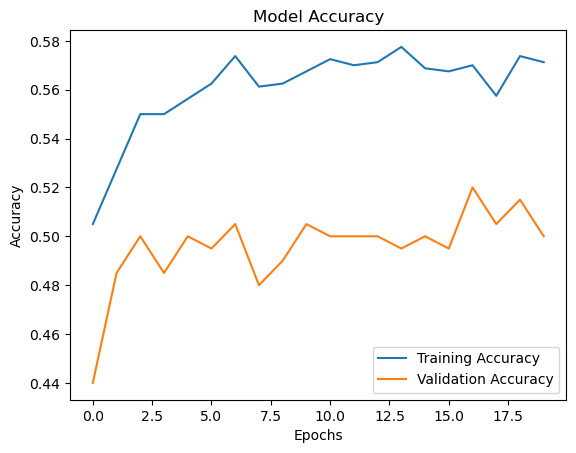

In [28]:
# A Feedforward Neural Network (FNN) is one of the simplest types of artificial neural networks (ANNs). It consists of an input layer, 
# one or more hidden layers, and an output layer, where each node in one layer is connected to every node in the next layer.
# The data moves only in one direction: from the input layer, through the hidden layers (if any), and finally to the output layer.
# FNNs are called "feedforward" because there are no loops in the network — the information is passed forward from one layer to the next. 
# This is in contrast to recurrent neural networks (RNNs), where the data can loop back on itself, allowing RNNs to handle 
# sequential data like text or time-series data.
# FNNs are often used for supervised learning tasks such as classification, regression, and forecasting. The model learns from 
# labeled data to predict outcomes based on input features.
# Loan Approval Prediction using FNN - we'll use synthetic data that simulates a loan approval scenario with features like credit score, 
# income, and loan amount.

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Generate synthetic data
np.random.seed(42)
n_samples = 1000

# Features: Credit score (300-850), Income ($20,000 - $150,000), Loan amount ($5,000 - $50,000)
credit_score = np.random.randint(300, 850, n_samples)
income = np.random.randint(20000, 150000, n_samples)
loan_amount = np.random.randint(5000, 50000, n_samples)

# Target: Loan approval (1 = Approved, 0 = Denied)
loan_approved = np.random.randint(0, 2, n_samples)

# Create a DataFrame
data = pd.DataFrame({
    'credit_score': credit_score,
    'income': income,
    'loan_amount': loan_amount,
    'loan_approved': loan_approved
})

# Features (X) and target (y)
X = data[['credit_score', 'income', 'loan_amount']]
y = data['loan_approved']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Feedforward Neural Network (MLP)
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=3, activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (binary classification: 0 or 1)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Print classification report
print(classification_report(y_test, y_pred))

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()